In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
trainX, testX,train_y, test_y = train_test_split(data['text'], data['label'],test_size=0.3, random_state=5)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [8]:
trainX = vectorizer.fit_transform(trainX)

In [9]:
testX = vectorizer.transform(testX)

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [11]:
pac = PassiveAggressiveClassifier()

In [12]:
pac.fit(trainX,train_y)

PassiveAggressiveClassifier()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
predict_y = pac.predict(testX)

In [15]:
accuracy_score(predict_y,test_y)

0.9384534455549711

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(test_y,predict_y,labels=['FAKE','REAL'])

array([[881,  54],
       [ 63, 903]], dtype=int64)

In [18]:
 from sklearn.metrics import plot_roc_curve

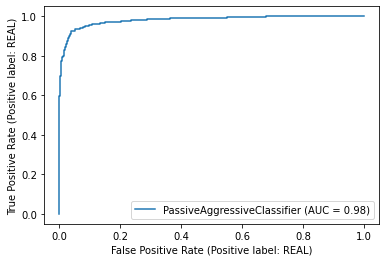

In [19]:
plot_roc_curve(pac,testX,test_y)

In [28]:
data['label'].replace({'REAL':0, 'FAKE': 1}, inplace=True)
trainX, testX,train_y, test_y = train_test_split(data['text'], data['label'],test_size=0.3, random_state=5)

In [21]:
import tensorflow as tf
text_vectorizer = tf.keras.layers.TextVectorization(
     output_mode='int', pad_to_max_tokens=True,max_tokens=2500 , standardize='lower_and_strip_punctuation')
text_vectorizer.adapt(data['text'])

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input,Embedding, Conv1D, GlobalMaxPooling1D

In [39]:
model = Sequential([
    Input((1,),dtype=tf.string),
    text_vectorizer,
    Embedding(2500,8),
    Conv1D(16,3),
    GlobalMaxPooling1D(),
    Dense(1,activation='sigmoid')
]
)

In [40]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')

In [43]:
model.fit(trainX, train_y, epochs=10, validation_data=(testX,test_y))

Epoch 1/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0781 - accuracy: 0.9761 - val_loss: 0.2242 - val_accuracy: 0.9016
Epoch 2/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0724 - accuracy: 0.9793 - val_loss: 0.2256 - val_accuracy: 0.8990
Epoch 3/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.2241 - val_accuracy: 0.9053
Epoch 4/10
139/139 [==============================] - 9s 65ms/step - loss: 0.0612 - accuracy: 0.9813 - val_loss: 0.2254 - val_accuracy: 0.9048
Epoch 5/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0564 - accuracy: 0.9835 - val_loss: 0.2262 - val_accuracy: 0.9069
Epoch 6/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0511 - accuracy: 0.9858 - val_loss: 0.2278 - val_accuracy: 0.9053
Epoch 7/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.2283 - val_accuracy: 0.9090

In [44]:
model = Sequential([
    Input((1,),dtype=tf.string),
    text_vectorizer,
    Embedding(2500,8),
    LSTM(16,activation='relu'),
    Dense(1,activation='sigmoid')
]
)

In [45]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(trainX, train_y, epochs=10, validation_data=(testX,test_y))

Epoch 1/10
139/139 [==============================] - 547s 4s/step - loss: 0.6930 - accuracy: 0.5153 - val_loss: 0.6930 - val_accuracy: 0.4918
Epoch 2/10
 34/139 [======>.......................] - ETA: 6:29 - loss: 0.6934 - accuracy: 0.5101